In [41]:
pip install statsbomb

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import pandas as pd
import statsbomb as sb

from mplsoccer import VerticalPitch
from mplsoccer import Pitch, Sbopen

In [43]:
events = sb.Events(event_id='3895052')

In [44]:
events

Events data for ID: 3895052

In [45]:
df = events.get_dataframe(event_type='shot')

In [46]:
df.head()

event_type                                    id  index  period  \
0       shot  2fa0470b-b096-4e0f-8f7e-5c3bdc27abbd    111       1   
1       shot  0a603bab-8f62-4b61-a69e-89540ece0633    405       1   
2       shot  3fd1b5d6-f4a7-405d-be71-58f35782e15c    440       1   
3       shot  bf565494-7169-456a-86fd-2b61f2002349    463       1   
4       shot  86ce68ca-57a3-4495-8309-d66397796e67    477       1   

      timestamp  minute  second  possession   possession_team    play_pattern  \
0  00:01:59.403       1      59           6  Bayer Leverkusen    Regular Play   
1  00:07:07.095       7       7          18        RB Leipzig    Regular Play   
2  00:07:50.275       7      50          19  Bayer Leverkusen  From Goal Kick   
3  00:08:30.193       8      30          20        RB Leipzig  From Goal Kick   
4  00:09:22.880       9      22          21        RB Leipzig     From Corner   

   ... follows_dribble redirect one_on_one open_goal  deflected  \
0  ...            None     None       None      None       None   
1  ...            None     None       None      None       None   
2  ...            None     None       None      None       None   
3  ...            None     None       None      None       None   
4  ...            None     None       None      None       None   

  start_location_x  start_location_y end_location_x end_location_y  \
0             92.2              27.1          117.4           40.3   
1            107.0              23.2          120.0           49.0   
2             96.2              44.8          120.0           46.4   
3            101.0              28.8          101.8           29.2   
4             98.1              29.8          118.5           36.5   

  end_location_z  
0            2.0  
1            0.4  
2            0.7  
3            NaN  
4            0.3  

[5 rows x 33 columns]

In [47]:
print(df.columns)

Index(['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'possession_team', 'play_pattern', 'off_camera', 'team',
       'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg',
       'key_pass_id', 'body_part', 'type', 'outcome', 'technique',
       'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal',
       'deflected', 'start_location_x', 'start_location_y', 'end_location_x',
       'end_location_y', 'end_location_z'],
      dtype='object')


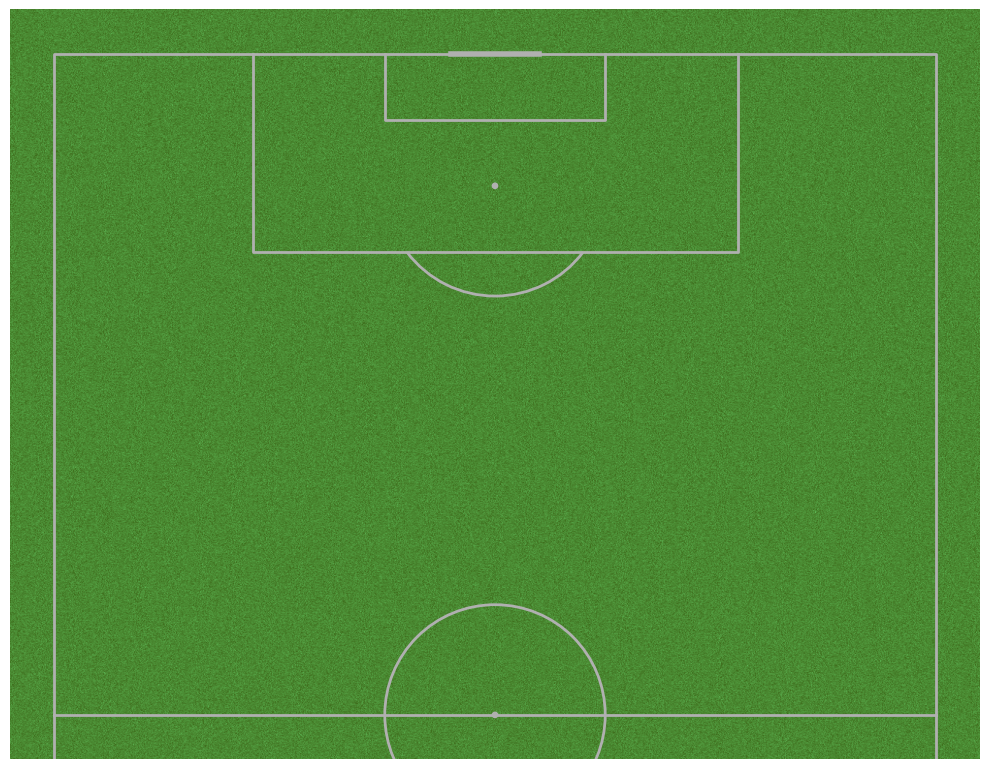

In [48]:
pitch = VerticalPitch(pitch_color='grass', half=True)

fig, ax = pitch.draw(figsize=(10, 8))

In [49]:
bayer_color = 'black'

In [51]:
bayer_df = df[df["team"] == "Bayer Leverkusen"].copy()

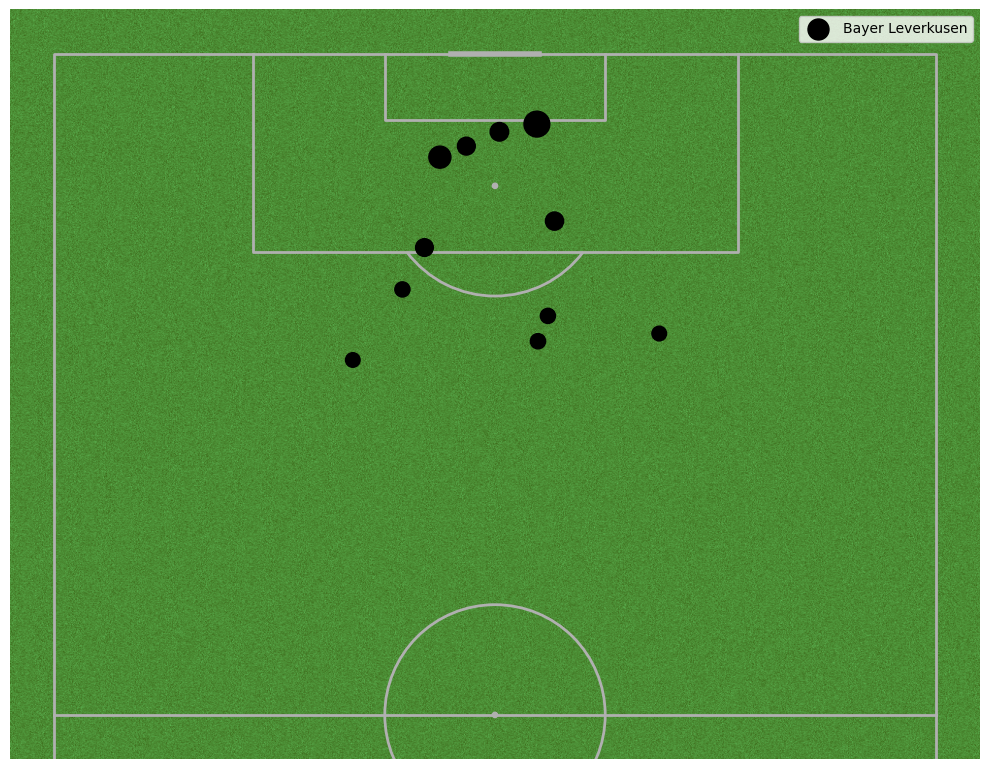

In [52]:
pitch =VerticalPitch(pitch_color='grass', half=True)
fig, ax = pitch.draw(figsize=(10, 8))


bayer_sc = pitch.scatter(bayer_df["start_location_x"], bayer_df["start_location_y"],
                   s=bayer_df["statsbomb_xg"]*500+100,
                   c=bayer_color,
                   ax=ax,
                   label="Bayer Leverkusen")
ax.legend()

In [53]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3895052)

In [57]:
# get data for a Sevilla versus Barcelona match with a high amount of shots
parser = Sbopen()
df, related, freeze, tactics = parser.event(3895052)

# subset the barcelona shots
df_shots_bayer = df[(df.type_name == 'Shot') & (df.team_name == 'Bayer Leverkusen')].copy()
# subset the barca open play passes
df_pass_bayer = df[(df.type_name == 'Pass') &
                   (df.team_name == 'Bayer Leverkusen') &
                   (~df.sub_type_name.isin(['Throw-in', 'Corner', 'Free Kick', 'Kick Off']))].copy()


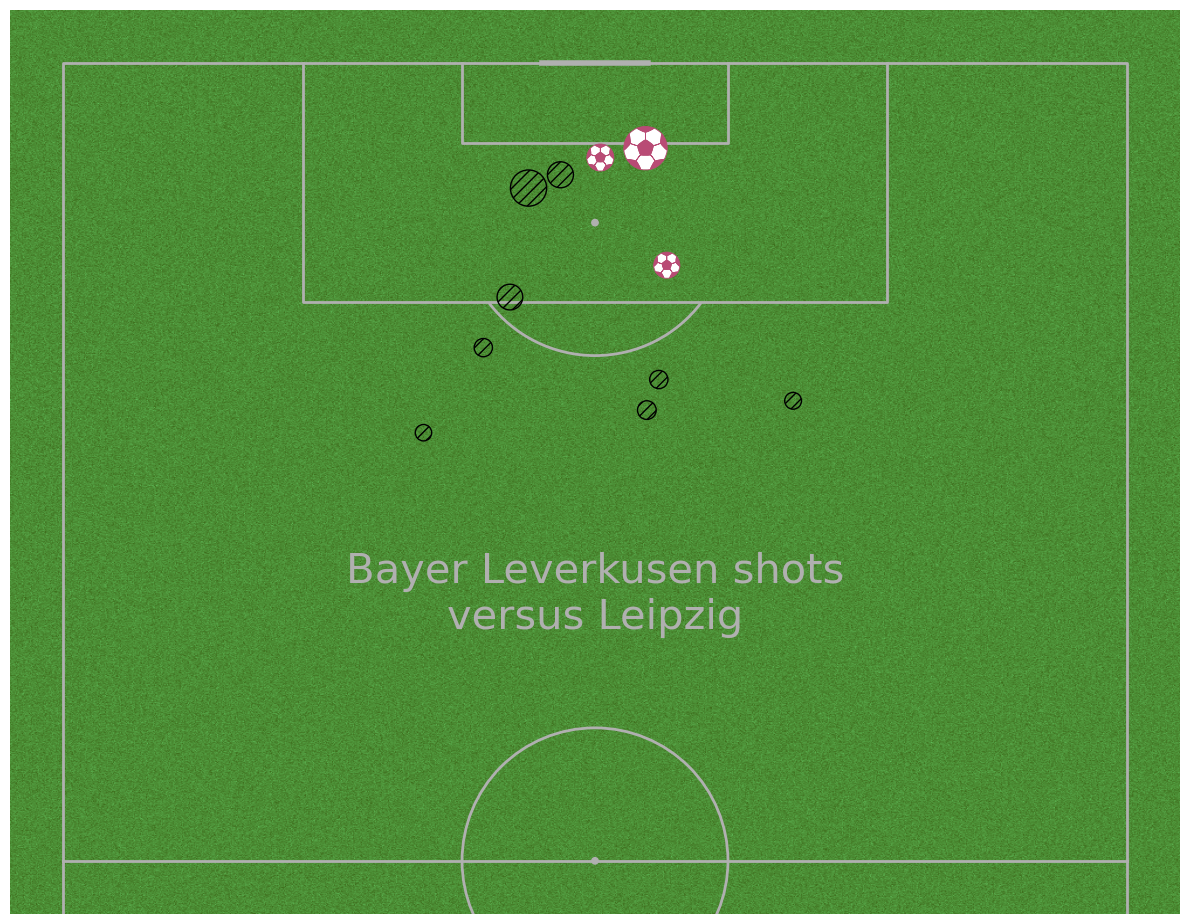

In [61]:
df_goals_bayer = df_shots_bayer[df_shots_bayer.outcome_name == 'Goal'].copy()
df_non_goal_shots_bayer = df_shots_bayer[df_shots_bayer.outcome_name != 'Goal'].copy()

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_non_goal_shots_bayer.x, df_non_goal_shots_bayer.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_non_goal_shots_bayer.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='black',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

# plot goal shots with a football marker
# 'edgecolors' sets the color of the pentagons and edges, 'c' sets the color of the hexagons
sc2 = pitch.scatter(df_goals_bayer.x, df_goals_bayer.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_bayer.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=80, s='Bayer Leverkusen shots\nversus Leipzig',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              color=pitch.line_color,
              va='center', ha='center')